In [8]:
import torch
import torchvision
import torchvision.transforms as transforms

In [9]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


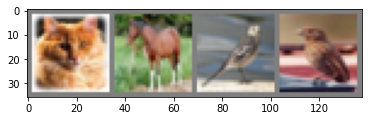

cat   horse bird  bird 


In [10]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Take the model from: https://github.com/Xinyi6/CIFAR10-CNN-by-Keras/blob/master/lic/model2_3.ipynb


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(80))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

I think the "Dense" layer in Tensorflow is just a linear layer. The parameter of the "Dense" layer is the "out_features" parameter of the linear layer in PyTorch. In TensorFlow, you don't need to specify the dimension of the input in a linear layer. You also don't need to specify the number of channels in a convolution layer. In either cases, they are implicitly specified by the previous layer.

In [27]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 32, 3, padding = "same")
        self.conv2 = nn.Conv2d(32, 64, 3, padding = "same")
        self.conv3 = nn.Conv2d(64, 128, 3, padding = "same")
        self.conv4 = nn.Conv2d(128, 256, 3, padding = "same")
        self.conv5 = nn.Conv2d(256, 512, 3, padding = "same")

        self.pool = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(p = 0.3)
        self.dropout2 = nn.Dropout(p = 0.4)

        self.flatten = nn.Flatten()

        self.linear1 = nn.Linear(512, 80)
        self.linear2 = nn.Linear(80, 20)

    def forward(self, x):

        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.dropout1(x)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.dropout1(x)

        x = self.conv3(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.dropout2(x)

        x = self.conv4(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.dropout2(x)

        x = self.conv5(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.dropout2(x)

        x = self.flatten(x)

        x = self.linear1(x)
        x = F.relu(x)
        self.dropout1(x)

        x = self.linear2(x)
        
        return x


net = Net()

In [23]:
input = torch.randn(32, 1, 5, 5)
# With default parameters
m = nn.Flatten()
output = m(input)
output.size()

torch.Size([32, 25])

In [32]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [33]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 20:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,    20] loss: 2.978
[1,    40] loss: 2.969
[1,    60] loss: 2.954
[1,    80] loss: 2.949
[1,   100] loss: 2.927
[1,   120] loss: 2.912
[1,   140] loss: 2.905
[1,   160] loss: 2.871
[1,   180] loss: 2.847
[1,   200] loss: 2.837
[1,   220] loss: 2.774
[1,   240] loss: 2.726
[1,   260] loss: 2.635
[1,   280] loss: 2.576
[1,   300] loss: 2.516
[1,   320] loss: 2.333
[1,   340] loss: 2.404
[1,   360] loss: 2.356
[1,   380] loss: 2.431
[1,   400] loss: 2.397
[1,   420] loss: 2.390
[1,   440] loss: 2.318
[1,   460] loss: 2.415


KeyboardInterrupt: ignored

In [7]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 53 %
